In [1]:
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
# from ROI_extraction import preprocess_image
import cv2
import os
# Set the path to dataset
dataset_path = '../images/3regimes/'

ids = []
labels = {}
classes = {'excess':1,'normal':0,'insufficient':2}
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        for filename in os.listdir(class_path) :
            if filename.endswith((".jpg", ".jpeg", ".png")):
                img_path = os.path.join(class_path, filename) 
                ids.append(img_path)
                labels[img_path]=classes[class_name]

# Set the input image dimensions
img_width, img_height = 800, 800
n_channels = 3

params = {'dim': (img_height,img_width),
          'batch_size': 64,
          'n_classes': 3,
          'n_channels': n_channels,
          'shuffle': False}

# Set the number of classes
num_classes = 3

def data_generation(list_IDs_temp):
    y = np.empty((len(list_IDs_temp)), dtype=int)
    X = []
    for i, ID in enumerate(list_IDs_temp):
        img= cv2.imread(ID)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        H_val,S_val,V_val = img[:,:,0],img[:,:,1],img[:,:,2]
        # Extract the mean values of hue, saturation, and value
        H_mean = np.mean(H_val)
        S_mean = np.mean(S_val)
        V_mean = np.mean(V_val)
        # Extract the standard deviation of hue, saturation, and value
        H_std = np.std(H_val)
        S_std = np.std(S_val)
        V_std = np.std(V_val)
        X.append([H_mean,H_std,S_mean,S_std,V_mean,V_std])
        y[i] = labels[ID]
    return pd.DataFrame(X,columns=['H_mean','H_std','S_mean','S_std','V_mean','V_std']),keras.utils.to_categorical(y, num_classes=params['n_classes']),y

In [2]:
X,y_categorical,y = data_generation(ids)

C:\Users\nrozo\AppData\Local\Temp\ipykernel_14100\2251255121.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=X[y==0]['V_mean'], shade=True, label='normal')
C:\Users\nrozo\AppData\Local\Temp\ipykernel_14100\2251255121.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=X[y==1]['V_mean'], shade=True, label='excess')
C:\Users\nrozo\AppData\Local\Temp\ipykernel_14100\2251255121.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=X[y==2]['V_mean'], shade=True, label='insufficient')


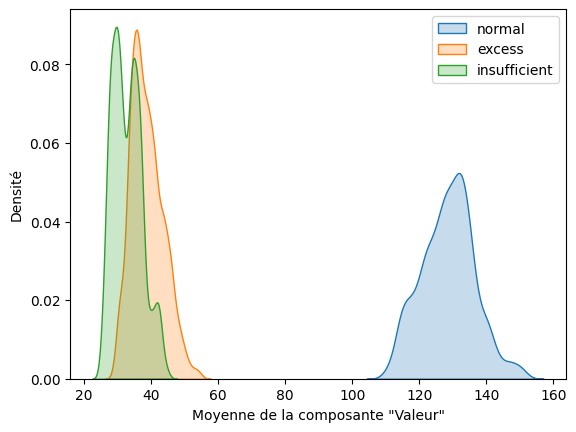

In [15]:
import seaborn as sns
sns.kdeplot(data=X[y==0]['V_mean'], shade=True, label='normal')
sns.kdeplot(data=X[y==1]['V_mean'], shade=True, label='excess')
sns.kdeplot(data=X[y==2]['V_mean'], shade=True, label='insufficient')

plt.xlabel('Moyenne de la composante "Valeur"')
plt.ylabel('Densité')
# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()

<Axes: ylabel='Frequency'>

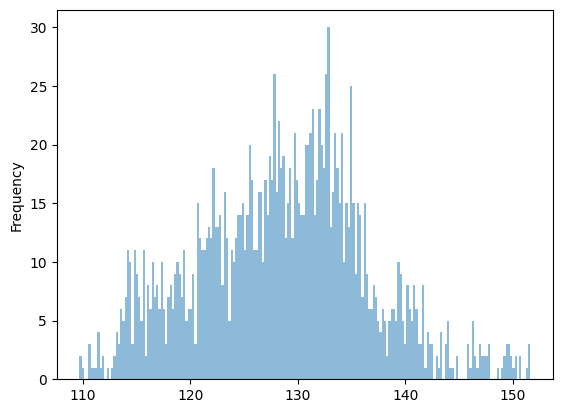

In [9]:
X[y==0]['V_mean'].plot.hist(bins=200, alpha=0.5)

In [10]:
for c in classes:
    print(f'{c}\n{X[y==classes[c]].mean()}\n')

excess
H_mean     14.994256
H_std      34.438097
S_mean    144.734035
S_std      85.391781
V_mean     38.784786
V_std      39.090767
dtype: float64

normal
H_mean     23.552977
H_std      45.330900
S_mean    155.847251
S_std      78.091102
V_mean    128.596100
V_std      94.845919
dtype: float64

insufficient
H_mean     15.343963
H_std      34.983598
S_mean    142.652974
S_std      83.594886
V_mean     32.886668
V_std      30.133873
dtype: float64

